# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another, whereas a regression is where you try to predict a number.

A few example classification problems include:
* Binary classification - is this a cat or a dog?
* Multiclass classification - is this a dog, cat or hamster?
* Multilabel classification - is this a dog, cat or both?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [2]:
# Make 1000 circles examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [5]:
# Creating a dataframe out of our circles
df = pd.DataFrame({'X0':X[:,0], "X1":X[:,1], "label":y})
df.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


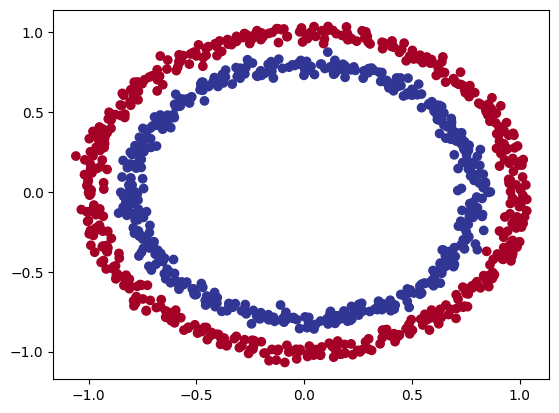

In [6]:
# visualise with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [7]:
# Checking the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X[18], y[18]

(array([-0.81891362, -0.10162399]), 1)

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=5)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/5


2023-07-28 20:21:54.124414: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 8ms/step - loss: 4.7295 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.1630 - accuracy: 0.4780
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 3.9594 - accuracy: 0.5400
Epoch 4/5
32/32 [==============================] - 0s 12ms/step - loss: 1.0893 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7264 - accuracy: 0.4950


In [10]:
# train for longer to improve our model
model.fit(X, y, epochs=200, verbose=0)

In [11]:
model.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

**Not performing well enough as the accuracy is 50%**

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.5000


[0.693293035030365, 0.5]

**Not working.......**

## Imporving the model

Tricks to improve a classification model:
* **Adding more layers** - If you want your model to learn more complex patterns, you can add more layers (e.g. GlobalAveragePooling2D or more Conv2D layers).
* **Increasing the number of hidden units** - The number of hidden units is a parameter you can tweak (similar to learning rate) which controls how many patterns your model learns.
* **Change the activation functions** - There are many different activation functions you can choose from, each has their own pros and cons.
* **Change the optimization function** - Whilst the Adam optimizer is a good default choice, you might want to try something like stochastic gradient descent (SGD) or RMSprop optimizer.
* **Fitting on more data** - This might sound obvious but the more data your model is fit on, the better chance it has to learn the patterns within the data.
* **Fitting for longer** - Along with more data, a model has a better chance of learning the patterns in the data when it has seen it multiple times. This is controlled by the epochs parameter.

In [14]:
# Adding an extra layer and changing the optimizer 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.7005 - accuracy: 0.5050


[0.7004658579826355, 0.5049999952316284]

In [16]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if y_pred.shape[1] > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


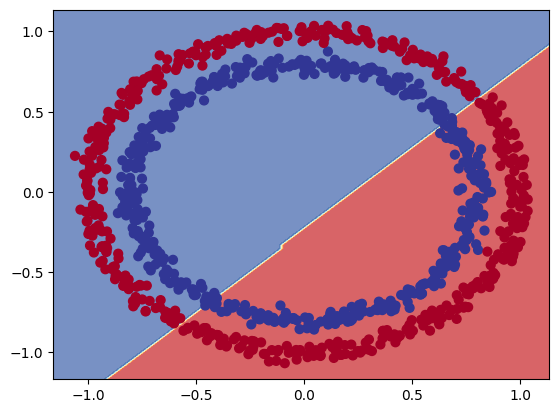

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100, verbose=0) 

In [19]:
model_4.evaluate(X, y)

32/32 [==============================] - 1s 9ms/step - loss: 0.7122 - accuracy: 0.4870


[0.7121740579605103, 0.4869999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classification


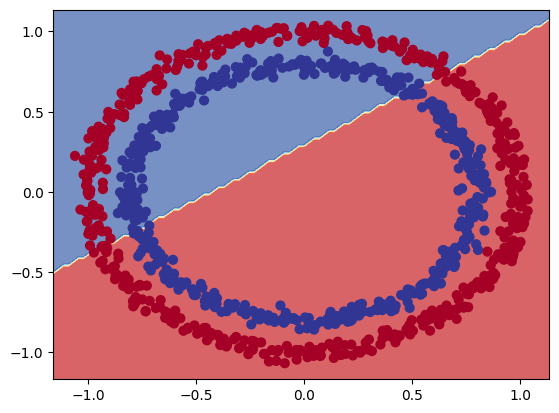

In [20]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

## Non-linearity

The combination of **linear(straight lines) and non-linear(curves) functions** is one of the key ingredients which makes neural networks so powerful.

In [21]:
# Build the neural network with a non-linear activation
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_1 = model_5.fit(X, y, epochs=100, verbose=0) 

In [22]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 5.3082 - accuracy: 0.4780


[5.308176040649414, 0.4779999852180481]

In [23]:
# https://playground.tensorflow.org/
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_2 = model_6.fit(X, y, epochs=250, verbose=0)

In [24]:
model_6.evaluate(X, y)

32/32 [==============================] - 1s 9ms/step - loss: 0.0454 - accuracy: 0.9940


[0.045370277017354965, 0.9940000176429749]

313/313 [==============================] - 1s 2ms/step
doing binary classification


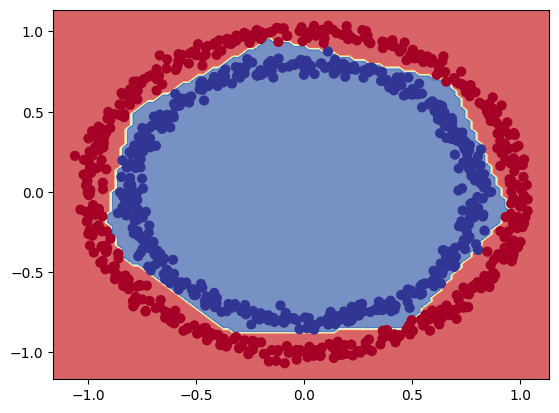

In [25]:
plot_decision_boundary(model=model_6, X=X, y=y)

## Evaluating and Improving our classification model

When it comes to evaluation classification models, there are a few different metrics we want to look at:
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

In [26]:
# So far we've been training and testing on the same dataset
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [28]:
tf.random.set_seed(42)
# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=['accuracy'])
# Fit the model
history_3 = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50


/Users/oabas/miniconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 10ms/step - loss: 0.6846 - accuracy: 0.5400
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.5888
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6703 - accuracy: 0.5700
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.6225
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.6463
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.6162
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.7738
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.7513
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5586 - accuracy: 0.8000
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5304 - accuracy: 0.8138
Epoch 11/50
25/25 [==========

In [29]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 14ms/step - loss: 0.0610 - accuracy: 0.9900


[0.06095908209681511, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


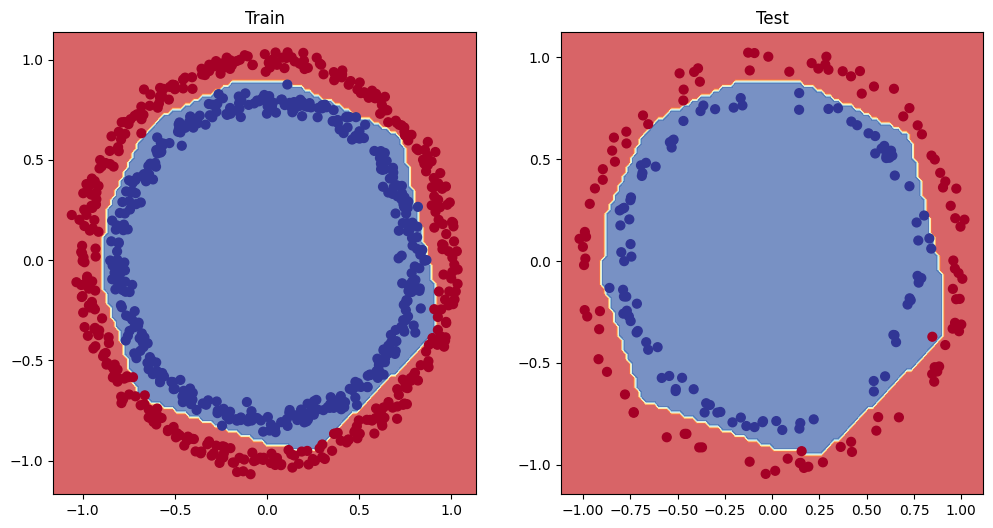

In [30]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_7, X=X_test, y=y_test)
plt.show();

In [31]:
# Accuracy and loss output
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.0610 - accuracy: 0.9900
Model loss on the test set: 0.06095908209681511
Model accuracy on the test set: 99.00%


In [32]:
# Make predictions
y_preds = model_7.predict(X_test) # note: this is in prediction probabilities form
y_preds[:10]

7/7 [==============================] - 0s 4ms/step


array([[0.9778054 ],
       [0.9778054 ],
       [0.9597471 ],
       [0.9778054 ],
       [0.01836233],
       [0.00337924],
       [0.8846949 ],
       [0.02480848],
       [0.9618286 ],
       [0.00288574]], dtype=float32)

In [33]:
# Convert the prediction probabilities to binary format and view the first 10
y_preds = tf.round(y_preds)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [34]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[99,  2],
       [ 0, 99]])

### Visualise confusion matrix with heatmap

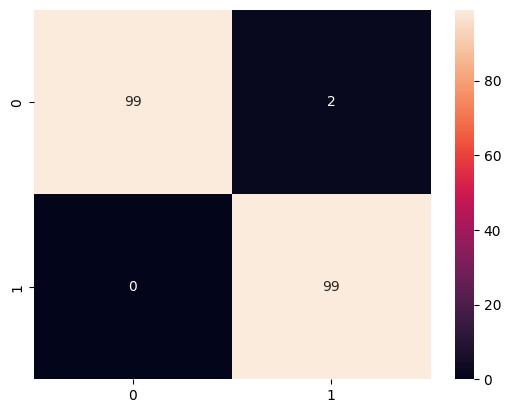

In [35]:
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_preds)  # calculate the confusion matrix

# Create heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

## Plot the loss (or training) curves

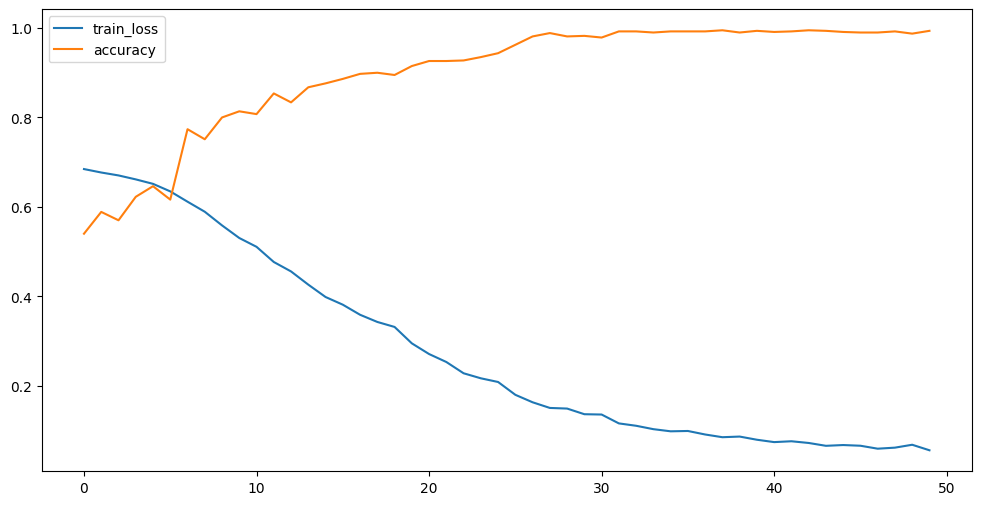

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(history_3.history['loss'], label='train_loss')
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.legend()
plt.show();

## Finding the best learning rate

A learning rate is one of the most important hyperparameters you can tune for your model. To find the ideal learning rate (one where the model converges quickly and with a high accuracy), you can use the following steps: 
* A learning rate **callback** - you can use the TensorBoard callback to log the learning rate, then interpret the results in TensorBoard (we'll see this in code soon).
* The learning rate finder - a model agnostic technique for finding the optimal learning rate for your model given your dataset.
* Visualize and experiment - once you've got results using the above two, you can visualize them and pick a learning rate to train your model with.

### The learning rate callback

In [37]:
tf.random.set_seed(42)
# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model
history_4 =  model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

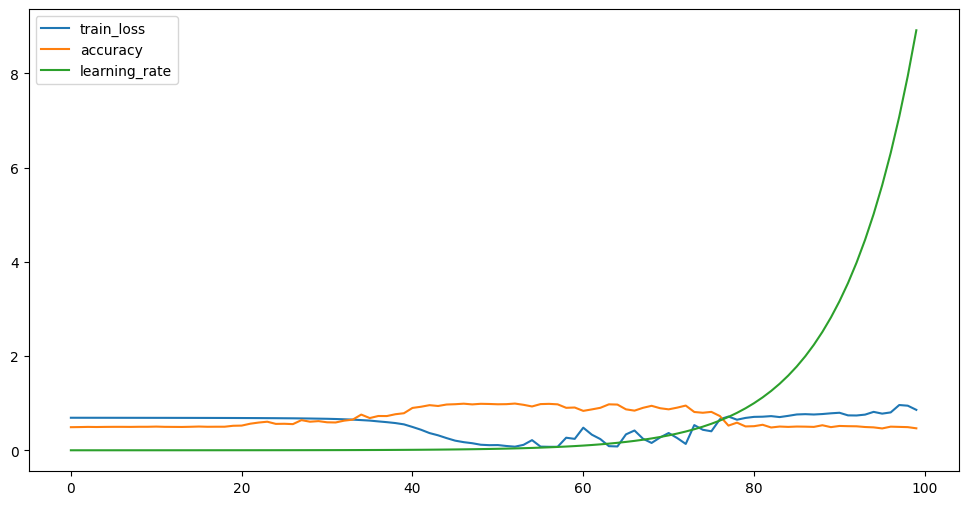

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(history_4.history['loss'], label='train_loss')
plt.plot(history_4.history['accuracy'], label='accuracy')
plt.plot(history_4.history['lr'], label='learning_rate')
plt.legend()
plt.show();

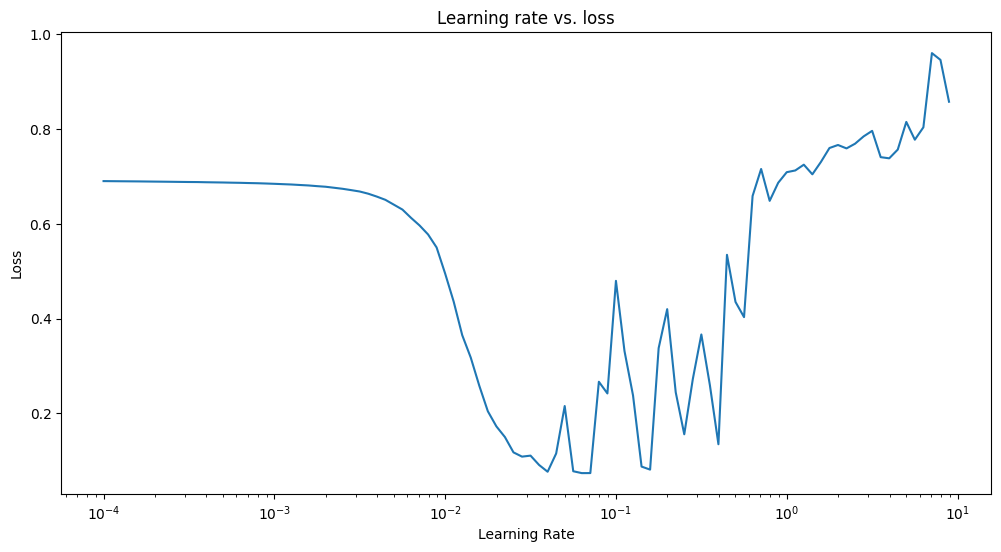

In [39]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12, 6))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()

**Ideal learning is somewhere between the fastest decrease in loss and the lowest loss. This can be found using the TensorBoard callback.**

In [40]:
# Let's try using the ideal learning rate with our model and see how it goes
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_9.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

history_5 = model_9.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 12ms/step - loss: 0.6988 - accuracy: 0.4563
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4512
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5038
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4913
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5050
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5263
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.5663
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6796 - accuracy: 0.6263
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.6263
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6589 - accuracy: 0.6400
Epoch 11/20
25/25 

In [41]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 1s 28ms/step - loss: 0.1409 - accuracy: 0.9700


[0.140884667634964, 0.9700000286102295]

In [42]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 1s 58ms/step - loss: 0.0610 - accuracy: 0.9900


[0.06095908209681511, 0.9900000095367432]

## Multiclass classification

When you have more than 2 classes to classify, it's known as multiclass classification. For example, classifying images of different dog breeds.

In [43]:
# Import Fashion MNIST dataset - The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [44]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [45]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

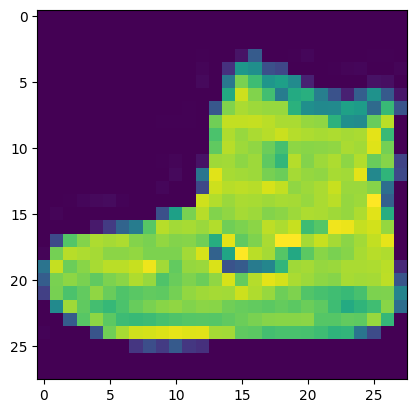

In [46]:
# Plot a single sample
plt.imshow(train_data[0]);

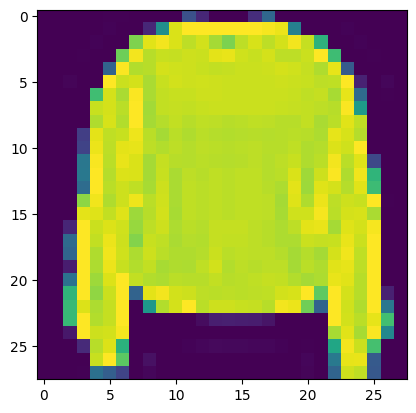

In [47]:
plt.imshow(train_data[7]);

In [48]:
# Create a small list so as to index onto the training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
len(class_names)

10

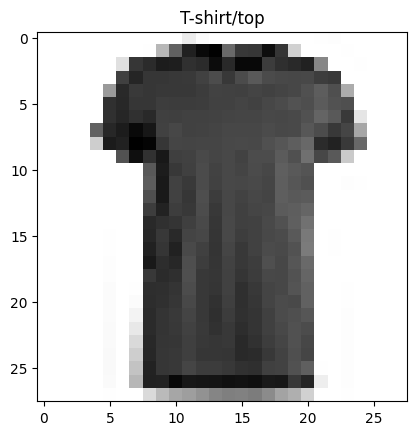

In [49]:
# Plot an example image and its label.
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.show()

### Building a Multiclass classification model 

For the multiclass classification model, we can use a similar architecture to out binary classifiers, however, we will need to change 

* The Input shaper to accept the 28x28 images
* The output shape to be 10 (one per class of clothing)
* The Loss function to be `tf.keras.losses.CategoricalCrossentropy()`
* The output activation function to be `tf.keras.activations.softmax`

In [50]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten the input (28, 28) image and make it a (,784) vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Since the training data is in integer form, we use SparseCategoricalCrossentropy()
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])  

history_10 = model_10.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=100, verbose=0)

In [51]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


**NOTE**: `Neural Networks` prefer data to be scaled(or normalized) to a small range like 0 to 1.

In [52]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [53]:
# Checking the min and max values of the scaled data
train_data.min(), train_data.max(), train_data_norm.min(), train_data_norm.max()

(0, 255, 0.0, 1.0)

In [54]:
# Building the Neural Network
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 1.5168 - accuracy: 0.3882 - val_loss: 0.9461 - val_accuracy: 0.6318
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8241 - accuracy: 0.6953 - val_loss: 0.8039 - val_accuracy: 0.7104
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7390 - accuracy: 0.7353 - val_loss: 0.7490 - val_accuracy: 0.7356
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7070 - accuracy: 0.7471 - val_loss: 0.7163 - val_accuracy: 0.7430
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6854 - accuracy: 0.7535 - val_loss: 0.7003 - val_accuracy: 0.7569
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6715 - accuracy: 0.7608 - val_loss: 0.7238 - val_accuracy: 0.7490
Epoch 7/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6614 - accuracy: 0.7619 - val_loss: 0.6916 - val_ac

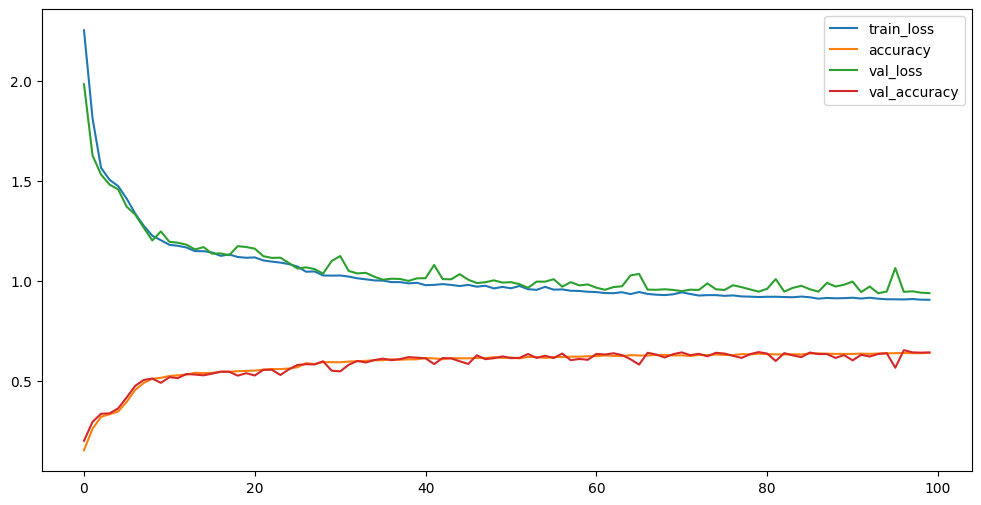

In [55]:
# Plot non-normalized data loss curves
plt.figure(figsize=(12, 6))
plt.plot(history_10.history['loss'], label='train_loss')
plt.plot(history_10.history['accuracy'], label='accuracy')
plt.plot(history_10.history['val_loss'], label='val_loss')
plt.plot(history_10.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

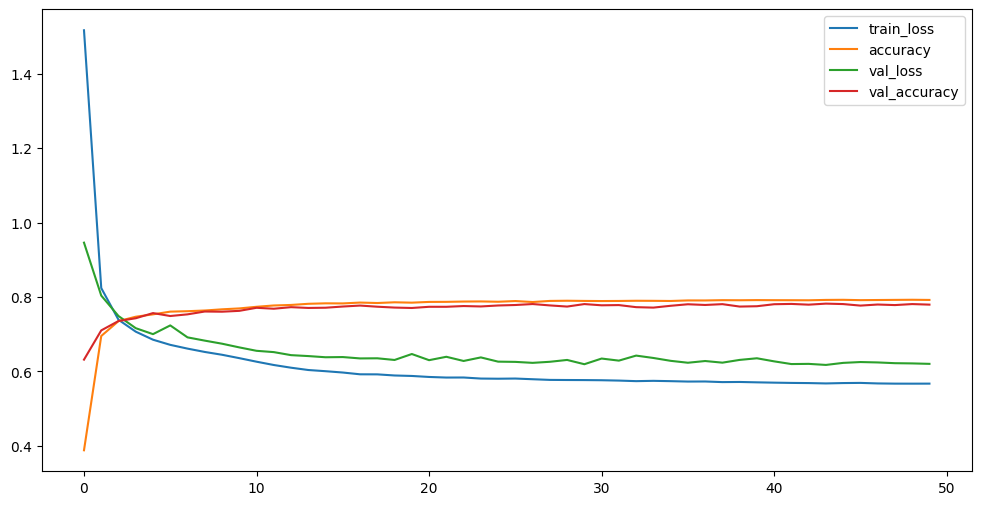

In [56]:
# Plot normalized data loss curves
plt.figure(figsize=(12, 6))
plt.plot(history_11.history['loss'], label='train_loss')
plt.plot(history_11.history['accuracy'], label='accuracy')
plt.plot(history_11.history['val_loss'], label='val_loss')
plt.plot(history_11.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### Ideal Learning rate

In [57]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_12.fit(train_data_norm, 
                               train_labels, 
                               validation_data=(test_data_norm, test_labels), 
                               epochs=50,
                               callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3643 - accuracy: 0.4848 - val_loss: 1.0695 - val_accuracy: 0.5821 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9767 - accuracy: 0.6311 - val_loss: 0.9394 - val_accuracy: 0.6479 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8653 - accuracy: 0.6843 - val_loss: 0.8194 - val_accuracy: 0.6983 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7616 - accuracy: 0.7120 - val_loss: 0.7666 - val_accuracy: 0.7018 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7181 - accuracy: 0.7257 - val_loss: 0.7381 - val_accuracy: 0.7236 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6925 - accuracy: 0.7372 - val_loss: 0.7272 - val_accuracy: 0.7244 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================

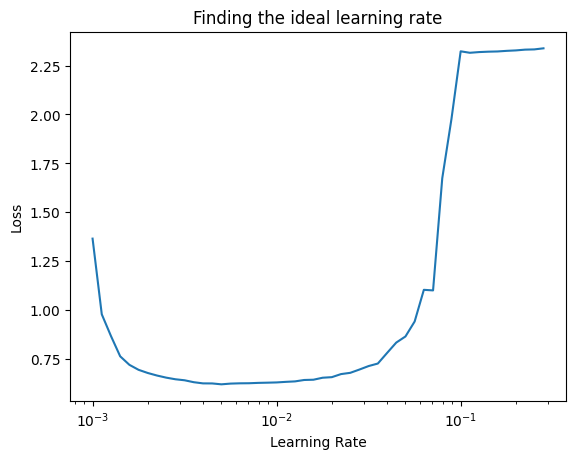

In [58]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10 ** (tf.range(50)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')
plt.show()

**Ideal lr is between 0.001 and 0.0015**

### Refit the model with the ideal learning rate

In [59]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0015),
                 metrics=["accuracy"])

ideal_lr = model_13.fit(train_data_norm, 
                        train_labels, 
                        validation_data=(test_data_norm, test_labels), 
                        epochs=30)

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 1.7336 - accuracy: 0.3059 - val_loss: 1.5182 - val_accuracy: 0.3980
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1547 - accuracy: 0.5526 - val_loss: 0.9222 - val_accuracy: 0.6647
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8512 - accuracy: 0.6761 - val_loss: 0.8350 - val_accuracy: 0.7050
Epoch 4/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7848 - accuracy: 0.7087 - val_loss: 0.7937 - val_accuracy: 0.7193
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7463 - accuracy: 0.7245 - val_loss: 0.7533 - val_accuracy: 0.7307
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7186 - accuracy: 0.7384 - val_loss: 0.7498 - val_accuracy: 0.7350
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6981 - accuracy: 0.7478 - val_loss: 0.7216 - val_ac

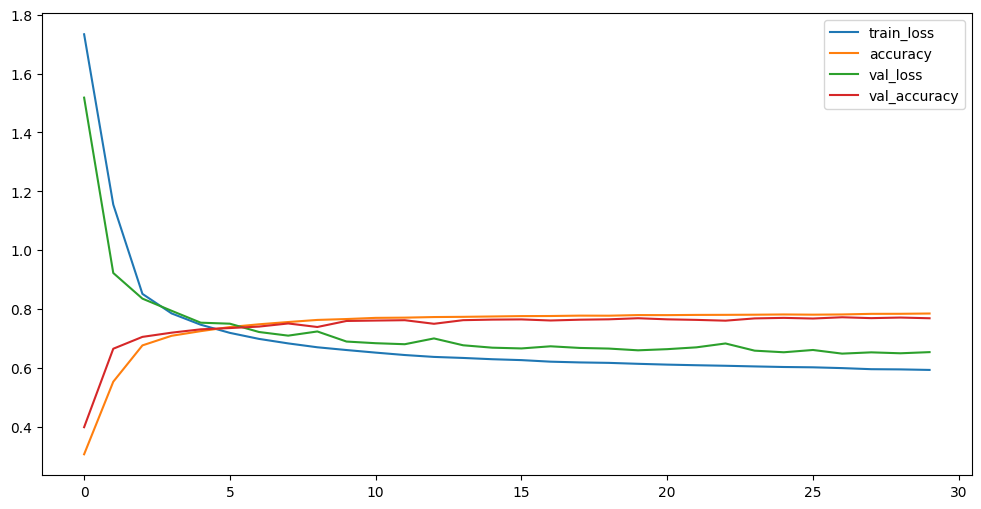

In [60]:
# Plot non-normalized data loss curves
plt.figure(figsize=(12, 6))
plt.plot(ideal_lr.history['loss'], label='train_loss')
plt.plot(ideal_lr.history['accuracy'], label='accuracy')
plt.plot(ideal_lr.history['val_loss'], label='val_loss')
plt.plot(ideal_lr.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### Evaluating Multiclass Classification Model

To evaluate a multiclass classification model, we could:
* Evaluate its confusion matrix
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Compare it to other models' results (cross-validation)

In [77]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [61]:
# Make some predictions with the model
y_probs = model_13.predict(test_data_norm)

313/313 [==============================] - 1s 3ms/step


In [62]:
y_probs[:5]

array([[2.17816928e-14, 2.02404160e-09, 1.75044568e-32, 2.60586130e-08,
        2.78680509e-20, 1.52880117e-01, 4.02586778e-18, 5.39012849e-02,
        1.33525964e-03, 7.91883290e-01],
       [4.26538615e-03, 2.20921283e-05, 8.23436260e-01, 2.10440792e-02,
        1.06027648e-01, 7.96648499e-04, 4.33329828e-02, 6.82962826e-04,
        3.89977853e-04, 2.00161116e-06],
       [1.34918751e-04, 9.98604357e-01, 6.82568355e-14, 1.25998084e-03,
        4.60487638e-12, 1.15025565e-10, 6.29319308e-09, 1.11092359e-11,
        2.50828037e-07, 4.36651987e-07],
       [1.54160061e-05, 9.99329567e-01, 1.21682371e-15, 6.54378207e-04,
        3.56643344e-13, 8.52083196e-11, 2.29254296e-10, 5.60167971e-12,
        3.86066681e-08, 6.43842952e-07],
       [2.86074102e-01, 2.78233085e-03, 2.25425914e-01, 8.16400349e-02,
        1.12018175e-02, 1.42302988e-05, 3.89583737e-01, 1.25857341e-05,
        3.26381857e-03, 1.38068026e-06]], dtype=float32)

In [63]:
y_probs[0]

array([2.1781693e-14, 2.0240416e-09, 1.7504457e-32, 2.6058613e-08,
       2.7868051e-20, 1.5288012e-01, 4.0258678e-18, 5.3901285e-02,
       1.3352596e-03, 7.9188329e-01], dtype=float32)

In [69]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [70]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [74]:
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[778,   4,  36,  79,  14,   1,  78,   0,  10,   0],
       [ 14, 927,   5,  44,   1,   0,   8,   0,   1,   0],
       [ 30,   1, 761,  15, 110,   0,  82,   0,   1,   0],
       [ 39,  26,  18, 810,  44,   4,  57,   0,   2,   0],
       [  3,   0, 244,  55, 648,   1,  46,   0,   3,   0],
       [  0,   0,   0,   4,   0, 881,   0,  53,   5,  57],
       [175,   1, 173,  51, 434,   0, 155,   0,  11,   0],
       [  0,   0,   0,   0,   0,  26,   0, 895,   0,  79],
       [  1,   0,  10,  15,  21,  37,  32,   5, 879,   0],
       [  0,   1,   0,   0,   0,  16,   0,  32,   2, 949]])

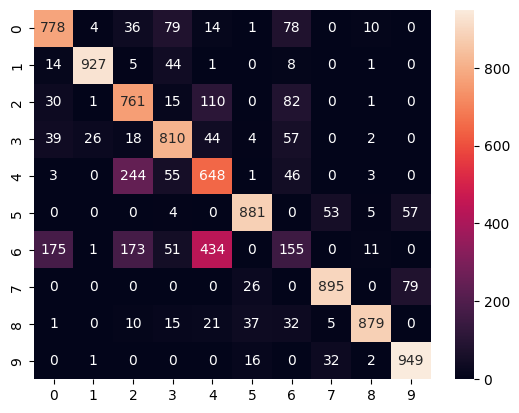

In [75]:
# Calculate confusion matrix
confusion_matrix = confusion_matrix(test_labels, y_preds)  # calculate the confusion matrix

# Create heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

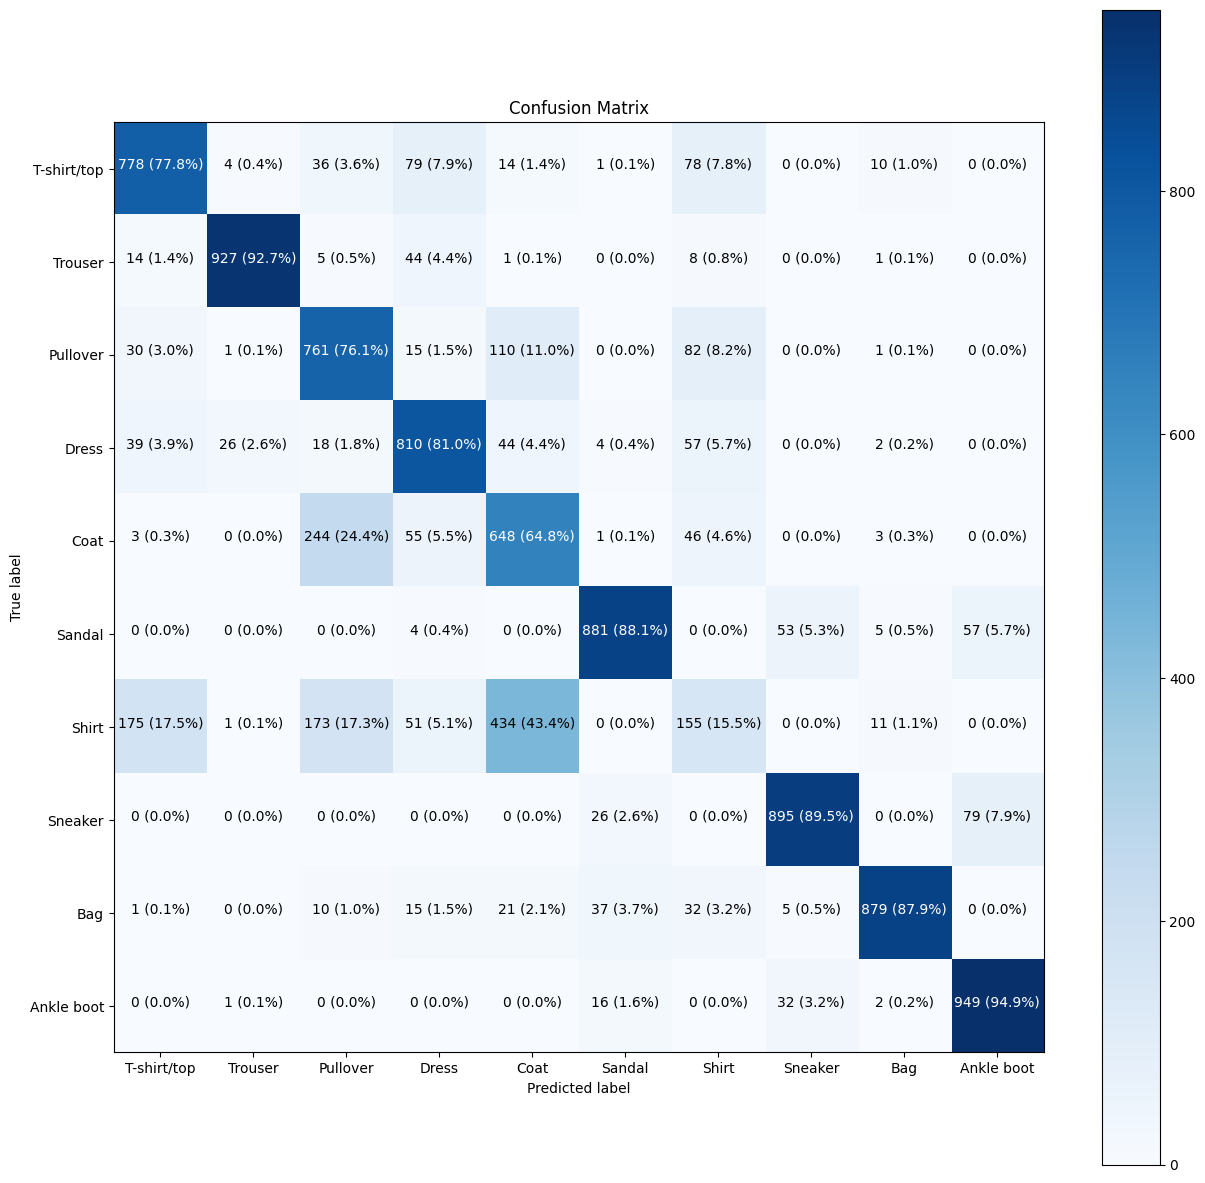

In [78]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much niiicceee.

Except the results aren't as good as they could be...

It looks like the model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

### Plot a random image along with its prediction.

In [79]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 25ms/step


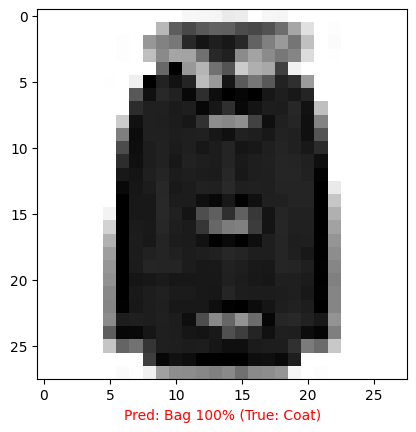

In [82]:
# Check out a random image as well as its prediction
plot_random_image(model=model_13, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

1/1 [==============================] - 0s 20ms/step


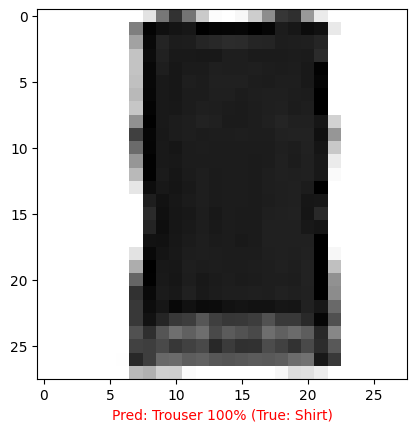

In [83]:
# Check out a random image as well as its prediction
plot_random_image(model=model_13, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

It seems the model is mixing up classes which are similar, for example, `Bag` with `Coat`, `Trouser` with `Shirt`.

Looking at the images, you can see how this might be the case.

The overall shape of a `Bag` and an `Coat` are similar.